In [1]:
read=[
'@HWI-ST491:153:D0B6LACXX:3:1101:1209:2220_1:N:0:',
'TTGCTATCCTCCTGGGCTgggTTG1GGACCAGCCGGCAGTTGTCTGG',
'+',
'CCFFFFFFHHHHFGIJJJJJJCCJJCJCJJJJCJJJJJJJJJJJCJH']
print(read)
len(read)
#FASTQ文件中每個序列通常有四行：

#1.第一行：必須以“@”開頭，後面跟著唯一的序列ID標識符，
#然後跟著可選的序列描述內容，標識符與描述內容用空格分開；

#2.第二行：序列字符（核酸為[AGCTN]+，蛋白為氨基酸字符）；

#3.第三行：必須以“+”開頭，後面跟著可選的ID標識符和可選的描述內容，
#如果“+”後面有內容，該內容必須與第一行“@”後的內容相同；

#4.第四行：鹼基質量字符，每個字符對應第二行相應位置鹼基或氨基酸的質量，
#該字符可以按一定規則轉換為鹼基質量得分，鹼基質量得分可以反映該鹼基的錯誤率。
#這一行的字符數與第二行中的字符數必須相同。


['@HWI-ST491:153:D0B6LACXX:3:1101:1209:2220_1:N:0:', 'TTGCTATCCTCCTGGGCTgggTTG1GGACCAGCCGGCAGTTGTCTGG', '+', 'CCFFFFFFHHHHFGIJJJJJJCCJJCJCJJJJCJJJJJJJJJJJCJH']


4

In [2]:
count ={}

for i in range(len(read[1])):
        if((read[1])[i] in count):
            count[(read[1])[i]]+=1
        else:
            count[(read[1])[i]]=1
print(count)
for key,value in count.items():
    print(key,":",value,end="\n")
    
ans=sorted(count.items(),key=lambda item:item[1])#value無法回推key
newcount={}
for i in range(len(count)):
    newcount[ans[i][0]]=ans[i][1]
print(newcount)
    


{'T': 13, 'G': 14, 'C': 12, 'A': 4, 'g': 3, '1': 1}
T : 13
G : 14
C : 12
A : 4
g : 3
1 : 1
{'1': 1, 'g': 3, 'A': 4, 'C': 12, 'T': 13, 'G': 14}


In [7]:

temp=0
count=0
value=list(map(lambda x:ord(x)-33,list(read[3])))
print(value)
for i in range(len(value)):
    temp+=value[i]
mean=temp/len(value)
value.sort()
for i in range(len(value)):
    count+=((value[i]-mean)*(value[i]-mean))
sd=(count/(len(value)-1))**0.5

print("average:"+str(mean))
print("min:"+str(value[0]))
print("max:"+str(value[len(value)-1]))
print("std:"+str(sd))


[34, 34, 37, 37, 37, 37, 37, 37, 39, 39, 39, 39, 37, 38, 40, 41, 41, 41, 41, 41, 41, 34, 34, 41, 41, 34, 41, 34, 41, 41, 41, 41, 34, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 34, 41, 39]
None
average:38.91489361702128
min:34
max:41
std:2.677034271061287


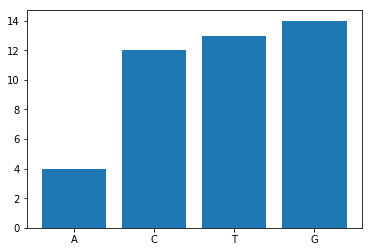

In [12]:
import matplotlib.pyplot as plt
del newcount["1"]
del newcount["g"]
plt.bar(newcount.keys(),newcount.values())
plt.show() 